### Step 1: Import Libraries and Load Data


First things first, we'll import the necessary libraries and load the dataset.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(url):
    """
    Loads the dataset from the given URL.
    """
    df = pd.read_csv(url)
    print(f"Data loaded successfully. The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
    return df

# Load the data
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_data(data_url)


Data loaded successfully. The dataset contains 65437 rows and 114 columns.


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


Understanding the data's structure is crucial before diving into analysis.

In [103]:
def examine_data(df):
    """
    Displays column names, data types, and summary information.
    """
    print("\nDataFrame Columns and Data Types:")
    print(df.dtypes)
    
    print("\nDataFrame Info:")
    df.info()
    
    print("\nFirst Five Rows of the DataFrame:")
    display(df.head())

# Examine the data
examine_data(df)



DataFrame Columns and Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

First Five Rows of the DataFrame:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



Missing data can skew our analysis, so we'll need to handle it appropriately.

**Note:** handling with dataset is empty after executing `handle_missing_data(df)`.
Please, 
- Check dataset: `check_missing_data(df)`
- and decide to remove the missing data: `handle_missing_data(df, threshold=0.5)`

Ah, we're hitting a classic data wrangling snag, aren't we? When df_clean turns up empty after executing df_clean = handle_missing_data(df), it's a telltale sign that our data has missing values scattered across many rows, and our current method of handling them is a bit too aggressive. Let's unravel this together and get to the bottom of it.

By default, dropna() without any parameters drops all rows where any column is missing a value. If your dataset has even a single NaN in a row, that entire row gets the axe. Given the nature of survey data, it's common to have missing responses scattered throughout, which means we're probably wiping out more data than we intend to.

Investigating Missing Data

Let's quantify the missingness in your data to see what's going on.

**Note:** Excuting function: `check_missing_data(df)` before `handle_missing_data(df)` if after dropping missing values, the dataset contains 0 rows.

In [104]:
def check_missing_data(df):
    """
    Checks the percentage of missing data per column.
    """
    missing_percentages = df.isnull().mean() * 100
    missing_percentages = missing_percentages[missing_percentages > 0]
    print("\nPercentage of Missing Data per Column:")
    print(missing_percentages.sort_values(ascending=False))

# Check missing data
check_missing_data(df)



Percentage of Missing Data per Column:
AINextMuch less integrated    98.245641
AINextLess integrated         96.401119
AINextNo change               80.900714
AINextMuch more integrated    79.464217
EmbeddedAdmired               74.428840
                                ...    
YearsCode                      8.508948
NEWSOSites                     7.871693
LearnCode                      7.563000
EdLevel                        7.110656
AISelect                       6.922689
Length: 109, dtype: float64


This output reveals that some columns have a high percentage of missing values. If we use `dropna()` as-is, we end up with an empty DataFrame because almost every row has at least one NaN.

##### Refining Our Approach
1. Drop Columns with Excessive Missing Data

- Let's decide on a threshold—for instance, if more than 50% of a column is missing, we might drop it.

2. Impute Remaining Missing Values
For the remaining missing values, we can fill them in instead of dropping more rows.

- Numeric Columns: Fill with mean or median.

- Categorical Columns: Fill with the mode (most frequent value).

In [111]:
def handle_missing_data(df, threshold=0.6):
    """
    Handles missing data by dropping columns with high missingness and imputing the rest.
    """
    # Drop columns with too many missing values
    missing_percentages = df.isnull().mean()
    cols_to_drop = missing_percentages[missing_percentages > threshold].index
    df_reduced = df.drop(columns=cols_to_drop)
    print(f"\nDropped columns with more than {threshold*100}% missing data:")
    print(list(cols_to_drop))
    
    # Impute missing values
    # Impute numeric columns with median
    numeric_cols = df_reduced.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df_reduced[col].fillna(df_reduced[col].median(), inplace=True)
    
    # Impute categorical columns with mode
    categorical_cols = df_reduced.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_reduced[col].isnull().any():
            df_reduced[col].fillna(df_reduced[col].mode()[0], inplace=True)
    
    print("\nMissing values have been imputed.")
    print(f"After cleaning, the dataset contains {df_reduced.shape[0]} rows and {df_reduced.shape[1]} columns.")
    return df_reduced


Now, when you run:

In [112]:
df_clean = handle_missing_data(df)


Dropped columns with more than 60.0% missing data:
['EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'ConvertedCompYearly']


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_23888\3006603090.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced[col].fillna(df_reduced[col].median(), inplace=True)
C:\Users\tdhoa\AppData\Local\Temp\ipykernel_23888\3006603090.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 


Missing values have been imputed.
After cleaning, the dataset contains 65437 rows and 104 columns.


You should end up with a DataFrame that retains most of your data.

**Why Was Empty Before*** `df_clean`
In our initial function, `df.dropna()` was too aggressive for the nature of your data. Survey data often has missing values due to respondents skipping questions. By dropping any row with a missing value, we effectively eliminated all our data.

#### Validating the Cleaned Data

Let's do a sanity check to ensure `df_clean` is no longer empty:

In [117]:
print(f"\nCleaned DataFrame dimensions: {df_clean.shape}")
print("\nSample of cleaned data:")
display(df_clean.head())



Cleaned DataFrame dimensions: (65437, 104)

Sample of cleaned data:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,0.0,20.0,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,7.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,7.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,20.0,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,7.0
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,0.0,20.0,15.0,10.0,5.0,0.0,0.0,Too long,Easy,7.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,0.0,20.0,15.0,10.0,5.0,0.0,0.0,Too short,Easy,7.0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



Let's explore key columns to understand the distribution of responses.


Value Counts for 'Employment':
Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student

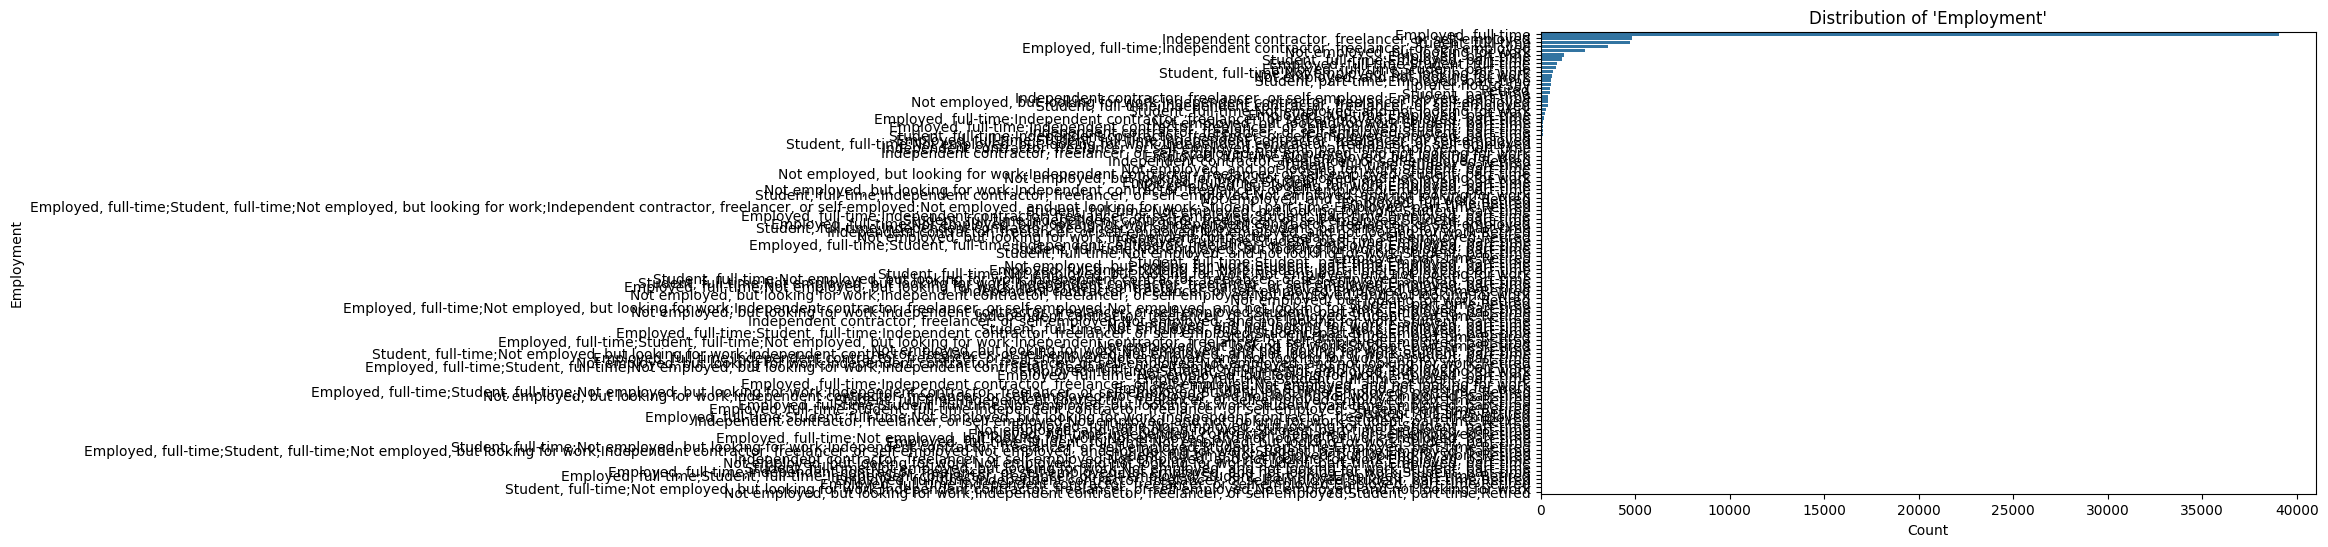


Value Counts for 'JobSat':
JobSat
7.0     42690
8.0      7509
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


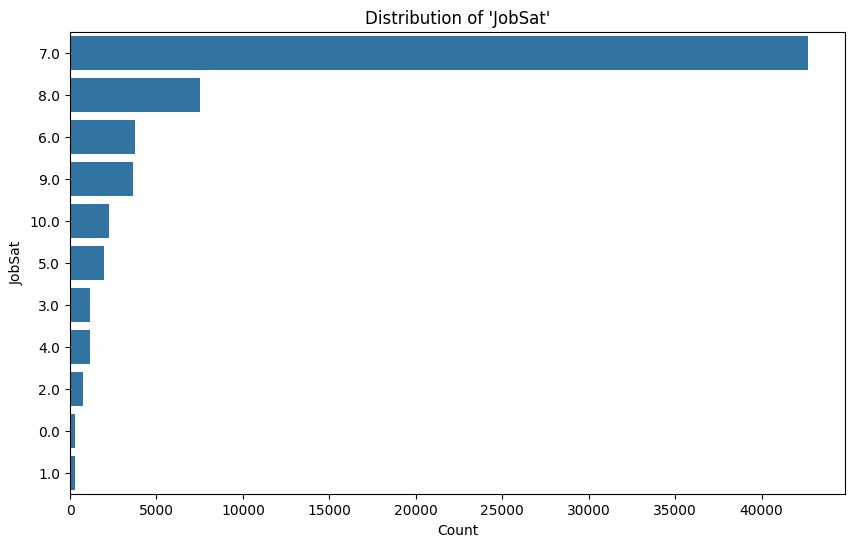


Value Counts for 'YearsCodePro':
YearsCodePro
2                     17995
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
32                      194
40                      194
3

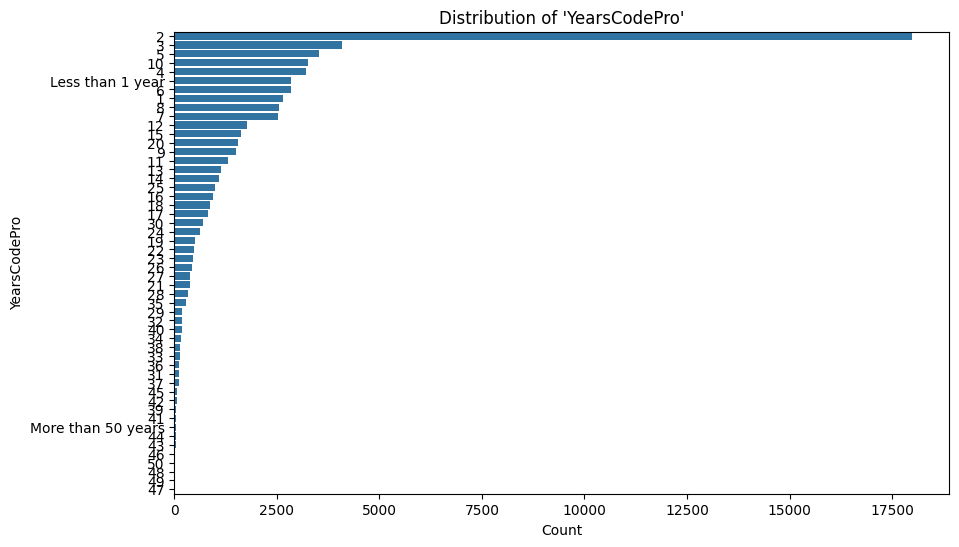

In [118]:
def analyze_key_columns(df, columns):
    """
    Calculates value counts for each specified column.
    """
    for column in columns:
        print(f"\nValue Counts for '{column}':")
        counts = df[column].value_counts()
        print(counts)
        
        # Visualize the distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=column, order=counts.index)
        plt.title(f"Distribution of '{column}'")
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.show()

# Analyze specified columns
key_columns = ['Employment', 'JobSat', 'YearsCodePro']
analyze_key_columns(df_clean, key_columns)


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


Understanding job satisfaction levels can provide insights into industry trends.

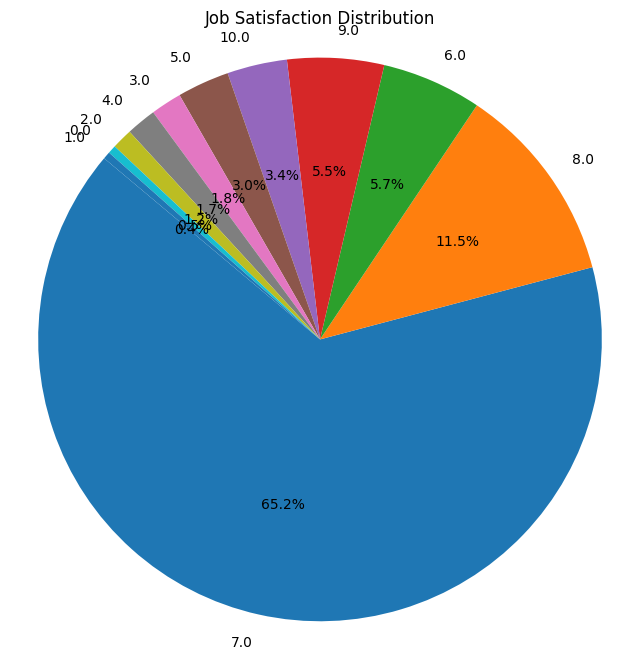


Interpretation:
The pie chart illustrates the proportion of respondents in each job satisfaction category, highlighting overall trends in the industry.


In [119]:
def visualize_job_satisfaction(df):
    """
    Creates a pie chart to visualize the distribution of JobSat.
    """
    job_sat_counts = df['JobSat'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Job Satisfaction Distribution')
    plt.axis('equal')
    plt.show()

    # Interpretation
    print("\nInterpretation:")
    print("The pie chart illustrates the proportion of respondents in each job satisfaction category, highlighting overall trends in the industry.")

# Visualize Job Satisfaction
visualize_job_satisfaction(df_clean)


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


Comparing the languages professionals have worked with and those they want to work with can reveal shifts in technology preferences.

In [ ]:
!pip install matplotlib-venn


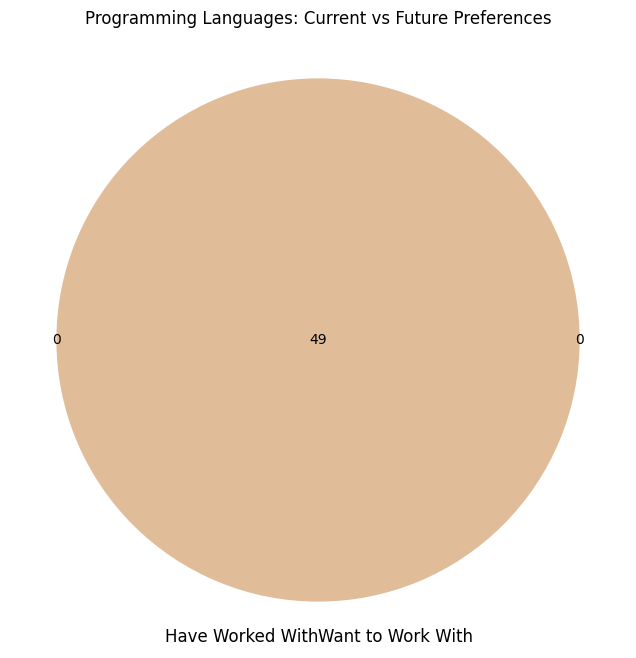


Interpretation:
The Venn diagram shows the overlap between languages respondents know and those they aspire to learn, highlighting emerging trends.


In [120]:
def programming_languages_analysis(df):
    """
    Compares the frequency of programming languages in 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith'.
    Visualizes the overlap using a Venn diagram.
    """
    from matplotlib_venn import venn2

    # Process the data
    have_worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(';')
    want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(';')

    # Flatten the lists and remove whitespace
    have_worked_list = [lang.strip() for sublist in have_worked_with for lang in sublist]
    want_to_work_list = [lang.strip() for sublist in want_to_work_with for lang in sublist]

    # Create sets
    set_have = set(have_worked_list)
    set_want = set(want_to_work_list)

    # Create the Venn diagram
    plt.figure(figsize=(8, 8))
    venn2([set_have, set_want], set_labels=('Have Worked With', 'Want to Work With'))
    plt.title('Programming Languages: Current vs Future Preferences')
    plt.show()

    # Interpretation
    print("\nInterpretation:")
    print("The Venn diagram shows the overlap between languages respondents know and those they aspire to learn, highlighting emerging trends.")

# Analyze programming languages
programming_languages_analysis(df_clean)


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


Let's explore how remote work frequency varies by country.


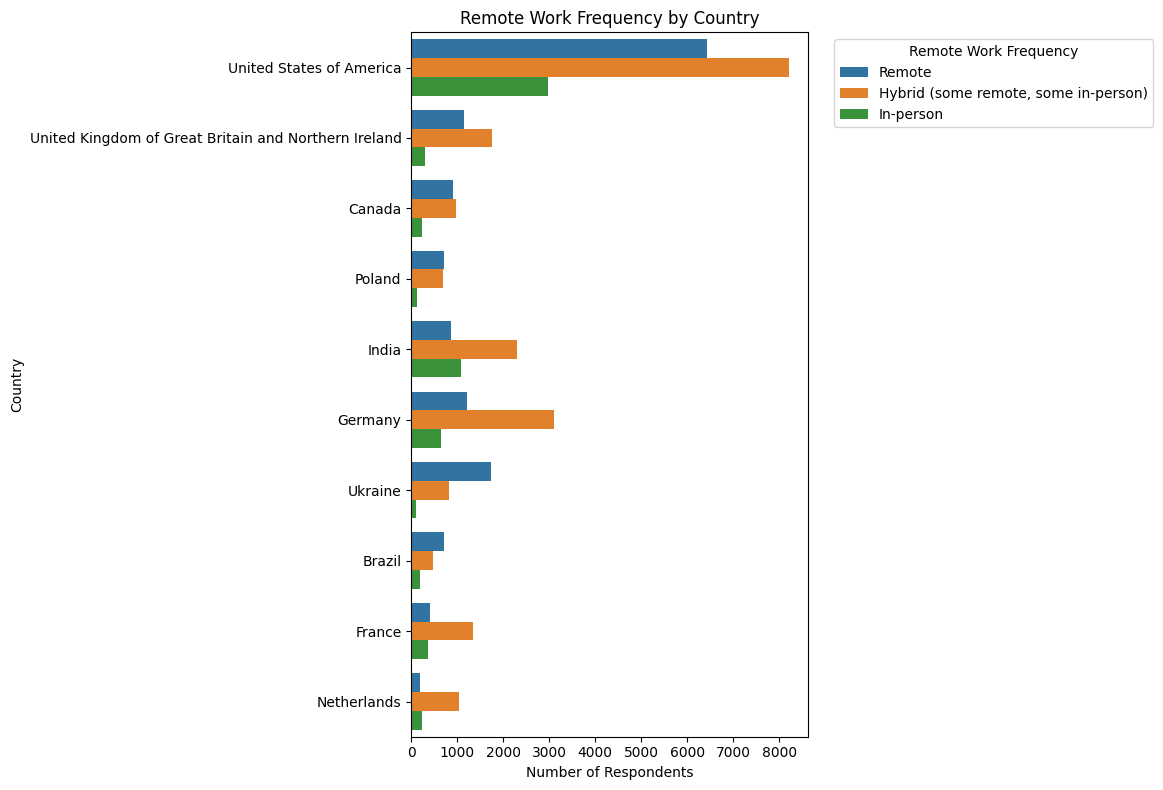


Interpretation:
The chart demonstrates the prevalence of remote work in different countries, offering insights into regional remote work adoption.


In [121]:
def analyze_remote_work_trends(df):
    """
    Visualizes the distribution of 'RemoteWork' by 'Country'.
    """
    # Focus on the top 10 countries by respondent count
    top_countries = df['Country'].value_counts().head(10).index
    df_top_countries = df[df['Country'].isin(top_countries)]

    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_top_countries, y='Country', hue='RemoteWork')
    plt.title('Remote Work Frequency by Country')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Country')
    plt.legend(title='Remote Work Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Interpretation
    print("\nInterpretation:")
    print("The chart demonstrates the prevalence of remote work in different countries, offering insights into regional remote work adoption.")

# Analyze remote work trends
analyze_remote_work_trends(df_clean)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
def correlation_job_satisfaction_experience(df):
    """
    Analyzes the correlation between 'JobSat' and 'YearsCodePro'.
    """
    # Map 'JobSat' to numerical values
    satisfaction_mapping = {
        'Very satisfied': 10,
        'Very satisfied': 9,
        'Very satisfied': 8,
        'Very satisfied': 7,
        'Very satisfied': 6,
        'Very satisfied': 5,
        'Slightly satisfied': 4,
        'Neither satisfied nor dissatisfied': 3,
        'Slightly dissatisfied': 2,
        'Very dissatisfied': 1
    }
    df['JobSatNum'] = df['JobSat'].map(satisfaction_mapping)

    # Clean 'YearsCodePro'
    df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

    # Drop missing values
    df_corr = df.dropna(subset=['JobSatNum', 'YearsCodePro'])

    # Calculate Spearman correlation
    from scipy.stats import spearmanr
    correlation, p_value = spearmanr(df_corr['JobSatNum'], df_corr['YearsCodePro'])
    print(f"\nSpearman Correlation Coefficient: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatNum')
    plt.title('Job Satisfaction vs. Professional Coding Experience')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction (Numeric)')
    plt.show()

    # Interpretation
    print("\nInterpretation:")
    print("The scatter plot and correlation coefficient suggest whether there's a relationship between experience and job satisfaction.")

# Correlation analysis
correlation_job_satisfaction_experience(df_clean)

In [125]:
df_clean['YearsCodePro']


0         2
1        17
2        27
3         2
4         2
         ..
65432     3
65433     2
65434     5
65435     2
65436     2
Name: YearsCodePro, Length: 65437, dtype: int64

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from scipy.stats import pearsonr, spearmanr

def load_and_examine_data(file_path):
    """Loads the data and displays basic information."""
    df = pd.read_csv(file_path)
    print("Column Names and Data Types:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    return df

def handle_missing_data(df):
    """Handles missing data by imputation or removal."""
    for col in df.columns:
        if df[col].dtype == 'object':  # Impute categorical columns with mode
            df[col] = df[col].fillna(df[col].mode()[0])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64': # Impute numerical with median
            df[col] = df[col].fillna(df[col].median())

    return df


def analyze_key_columns(df, columns):
    """Analyzes key columns and prints value counts."""
    for col in columns:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())


def visualize_job_satisfaction(df):
    """Visualizes job satisfaction using a KDE plot."""
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df['JobSat'], fill=True)
    plt.title('Distribution of Job Satisfaction')
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Density')
    plt.show()
    print("Interpretation: The KDE plot shows the distribution of job satisfaction scores. Peaks indicate common satisfaction levels, while the spread indicates the range of responses.")


def analyze_programming_languages(df):
    """Compares and visualizes programming language preferences."""
    lang_have_worked_with = set(df['LanguageHaveWorkedWith'].str.split(';').explode().dropna())

    lang_want_to_work_with = set(df['LanguageWantToWorkWith'].str.split(';').explode().dropna())

    venn2([lang_have_worked_with, lang_want_to_work_with], ('Have Worked With', 'Want to Work With'))
    plt.title("Overlap of Programming Languages")
    plt.show()

def analyze_remote_work(df):
    """Visualizes remote work trends by region (using Country as a proxy for region)."""
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Country', hue='RemoteWork', data=df, order=df['Country'].value_counts().iloc[:10].index) #top 10
    plt.title('Remote Work Distribution by Country (Top 10)')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Country')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def correlation_jobsat_experience(df):
    """Analyzes correlation between job satisfaction and coding experience."""
    df_filtered = df.dropna(subset=['JobSat', 'YearsCodePro'])  # Drop rows with missing values
    
    # Convert 'YearsCodePro' to numeric, handling 'Less than 1 year' and 'More than 50 years'
    df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(float)

    pearson_corr, _ = pearsonr(df_filtered['JobSat'], df_filtered['YearsCodePro'])
    spearman_corr, _ = spearmanr(df_filtered['JobSat'], df_filtered['YearsCodePro'])

    print(f"Pearson Correlation: {pearson_corr}")
    print(f"Spearman Correlation: {spearman_corr}")



def crosstab_analysis(df):
    """Performs cross-tabulation analysis and visualization."""

    crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
    print("\nCross-tabulation of Employment vs. Education Level:")
    print(crosstab)


    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Employment Status by Education Level')
    plt.xlabel('Employment Status')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



def export_cleaned_data(df, file_path):
    """Exports the cleaned data to a CSV file."""
    df.to_csv(file_path, index=False)



# Example usage (assuming your data file is named 'survey-data.csv'):
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'  # Replace with your file path
cleaned_file_path = 'cleaned_survey_data.csv'

df = load_and_examine_data(file_path)
df = handle_missing_data(df)
analyze_key_columns(df, ['Employment', 'JobSat', 'YearsCodePro'])
visualize_job_satisfaction(df)
analyze_programming_languages(df)
analyze_remote_work(df)
correlation_jobsat_experience(df)
crosstab_analysis(df)
export_cleaned_data(df, cleaned_file_path)